# Exogenous variables (features)


Exogenous variables are predictors that are independent of the model being used for forecasting, and their future values must be known in order to include them in the prediction process. The inclusion of exogenous variables can enhance the accuracy of forecasts.

In skforecast, exogenous variables can be easily included as predictors in all forecasting models. To ensure that their effects are accurately accounted for, it is crucial to include these variables during both the training and prediction phases. This will help to optimize the accuracy of forecasts and provide more reliable predictions.

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

When exogenous variables are used, their values must be aligned so that y[i] regresses on exog[i].

</div>

<p style="text-align: center">
    <img src="../img/matrix_transformation_with_exog_variable.png" style="width: 550px;">
    <br>
    <font size="2.5"> <i>Time series transformation including an exogenous variable.</i></font>
</p>

<div class="admonition note" name="html-admonition" style="background: rgba(255,145,0,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #ff9100; border-color: #ff9100; padding-left: 10px; padding-right: 10px">

<p class="title">
    <i style="font-size: 18px; color:#ff9100; border-color: #ff1744;"></i>
    <b style="color: #ff9100;"> <span style="color: #ff9100;">&#9888;</span> Warning</b>
</p>

When exogenous variables are included in a forecasting model, it is assumed that all exogenous inputs are known in the future. Do not include exogenous variables as predictors if their future value will not be known when making predictions.

</div>

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

For a detailed guide on how to include categorical exogenous variables, please visit <a href="https://skforecast.org/latest/user_guides/categorical-features.html">Categorical Features</a>.

</div>

## Libraries

In [1]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.datasets import fetch_dataset
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

## Data

h2o_exog
--------
Monthly expenditure ($AUD) on corticosteroid drugs that the Australian health
system had between 1991 and 2008. Two additional variables (exog_1, exog_2) are
simulated.
Hyndman R (2023). fpp3: Data for Forecasting: Principles and Practice (3rd
Edition). http://pkg.robjhyndman.com/fpp3package/,
https://github.com/robjhyndman/fpp3package, http://OTexts.com/fpp3.
Shape of the dataset: (195, 3)


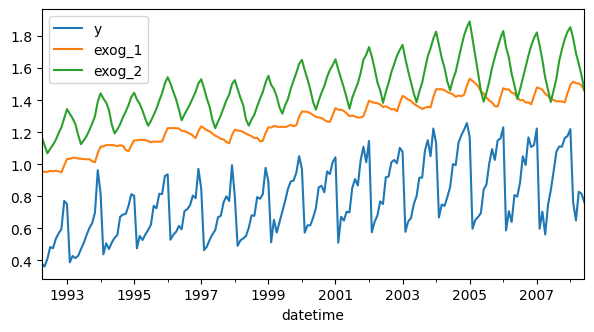

In [2]:
# Download data
# ==============================================================================
data = fetch_dataset(name='h2o_exog', raw=False)
data.index.name = 'datetime'

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(7, 3.5))
data.plot(ax=ax);

In [3]:
# Split data in train and test
# ==============================================================================
steps = 36
data_train = data.iloc[:-steps, :]
data_test  = data.iloc[-steps:, :]

## Train forecaster

In [4]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(random_state=123, verbose=-1),
                 lags      = 15
             )

forecaster.fit(
    y    = data_train['y'],
    exog = data_train[['exog_1', 'exog_2']]
)

forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor(random_state=123, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Differentiation order: None 
Exogenous included: True 
Exogenous variables names: ['exog_1', 'exog_2'] 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1} 
fit_kwargs: {} 
Creation date: 2024-07-29 16:46:47 
Last fi

## Prediction

If the `Forecaster` has been trained using exogenous variables, they should be provided during the prediction phase.

In [5]:
# Predict
# ==============================================================================
steps = 36
predictions = forecaster.predict(
                  steps = steps,
                  exog  = data_test[['exog_1', 'exog_2']]
              )

predictions.head(3)

2005-07-01    1.023969
2005-08-01    1.044023
2005-09-01    1.110078
Freq: MS, Name: pred, dtype: float64

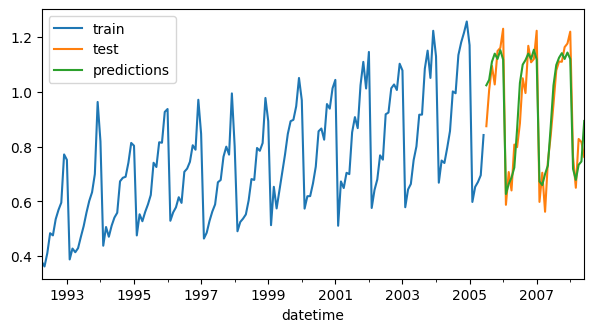

In [6]:
# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(7, 3.5))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [7]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
            )

print(f"Test error (MSE): {error_mse}")

Test error (MSE): 0.005576949968874203


## Feature importances

If exogenous variables are included as predictors, they have a value of feature importances.

In [8]:
# Feature importances with exogenous variables
# ==============================================================================
forecaster.get_feature_importances()

,feature,importance
11,lag_12,66
15,exog_1,49
16,exog_2,37
10,lag_11,36
5,lag_6,31
13,lag_14,26
4,lag_5,26
2,lag_3,25
14,lag_15,24
3,lag_4,23


## Backtesting with exogenous variables

All the backtesting strategies available in skforecast can also be applied when incorporating exogenous variables in the forecasting model. Visit the [Backtesting section](https://skforecast.org/latest/user_guides/backtesting#backtesting-with-exogenous-variables) for more information.